In [1]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [2]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정 / 개인 자유
plt.style.use("ggplot")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

#한글 폰트 설정
plt.rcParams['font.family'] = 'HYGothic-Extra'

data = pd.read_csv('실전db.csv')
data

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [4]:
# 2013년 이후 데이터만

after_2013 = data.loc[data['JOIN_DATE'] >= '2013-02-04']
after_2013

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [5]:
after_2013.reset_index(inplace=True)
after_2013.drop('index', axis=1, inplace=True)
after_2013

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
878173,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
878174,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
878175,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
878176,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


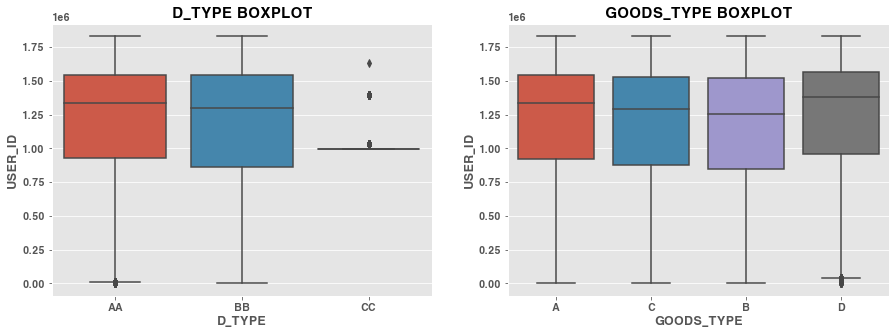

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(x='D_TYPE', y='USER_ID', data=after_2013)
#plt.xticks(rotation=90)
plt.title('D_TYPE BOXPLOT')
plt.ylabel('USER_ID')

plt.subplot(122)
sns.boxplot(x='GOODS_TYPE', y='USER_ID', data=after_2013)
#plt.xticks(rotation=90)
plt.title('GOODS_TYPE BOXPLOT')

plt.show()

In [7]:
after_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878178 entries, 0 to 878177
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     878178 non-null  int64 
 1   JOIN_DATE   878178 non-null  object
 2   D_TYPE      878178 non-null  object
 3   STORE_ID    878178 non-null  int64 
 4   GOODS_TYPE  878178 non-null  object
 5   DATE        878178 non-null  object
 6   COUNT       878178 non-null  int64 
 7   AD1         878178 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.6+ MB


In [8]:
#!pip install IPython

from IPython.display import Image

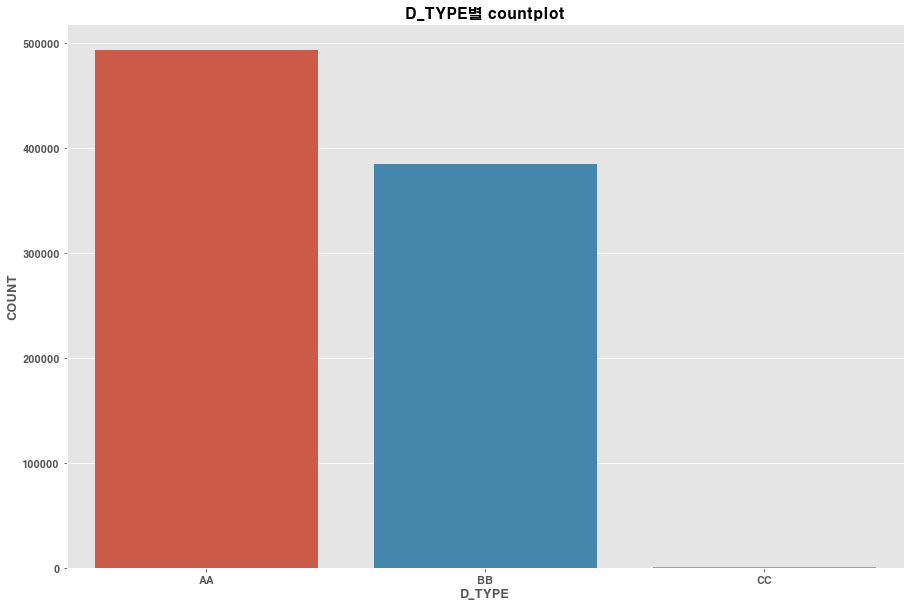

In [9]:
Image('d_type_countplot.png')

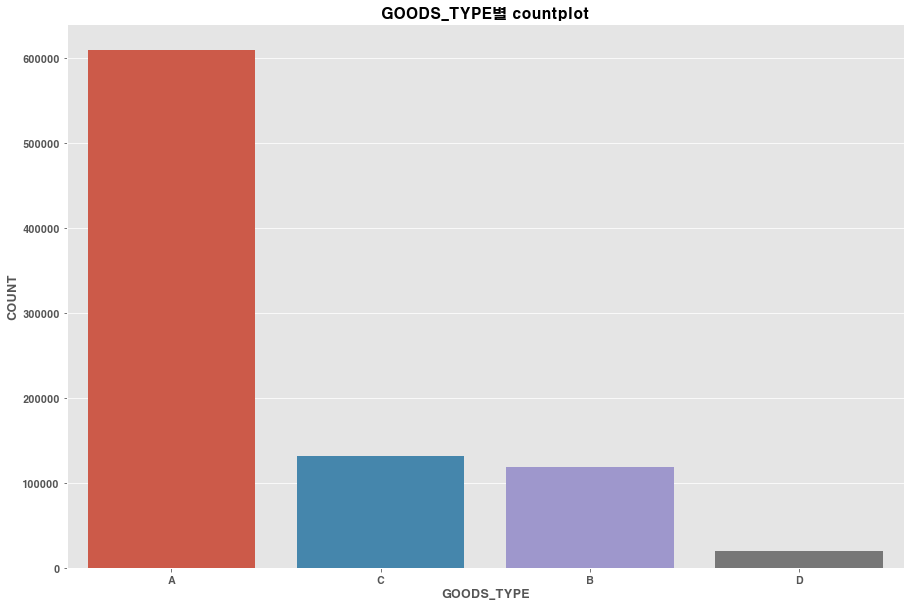

In [10]:
Image('goods_type_countplot.png')

In [1]:
# after_2013.groupby('GOODS_TYPE').count()

# # A ; 609028, B : 118409,  C : 130983,  D : 19758

In [2]:
# after_2013.groupby('D_TYPE').count()

# # AA : 493166
# # BB : 384541
# # CC : 471

In [13]:
after_2013.groupby('D_TYPE').count().reset_index()['D_TYPE']

0    AA
1    BB
2    CC
Name: D_TYPE, dtype: object

In [16]:
after_2013.head(1)

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN


In [19]:
# D_TYPE과 GOODS_TYPE 간의 관계를 살펴보기 위해 나머지 드랍

aft = after_2013.drop(['USER_ID','JOIN_DATE','STORE_ID','DATE','COUNT','AD1'], axis=1)
aft

,D_TYPE,GOODS_TYPE
0,AA,A
1,BB,A
2,BB,A
3,BB,C
4,AA,C
...,...,...
878173,BB,B
878174,BB,B
878175,AA,B
878176,BB,B


## 귀무가설 : D_type과 GOODS_type은 관계가 있다. (H0)

### 원핫인코딩으로 변환하여 관계 살펴보기

In [20]:
df = pd.get_dummies(aft)
df

,D_TYPE_AA,D_TYPE_BB,D_TYPE_CC,GOODS_TYPE_A,GOODS_TYPE_B,GOODS_TYPE_C,GOODS_TYPE_D
0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
878173,0,1,0,0,1,0,0
878174,0,1,0,0,1,0,0
878175,1,0,0,0,1,0,0
878176,0,1,0,0,1,0,0


In [21]:
df.corr()

,D_TYPE_AA,D_TYPE_BB,D_TYPE_CC,GOODS_TYPE_A,GOODS_TYPE_B,GOODS_TYPE_C,GOODS_TYPE_D
D_TYPE_AA,1.000000,-0.998911,-0.026218,0.018726,-0.003561,-0.022852,0.004880
D_TYPE_BB,-0.998911,1.000000,-0.020446,-0.018959,0.003934,0.022856,-0.005026
D_TYPE_CC,-0.026218,-0.020446,1.000000,0.004945,-0.007993,-0.000035,0.003118
GOODS_TYPE_A,0.018726,-0.018959,0.004945,1.000000,-0.593845,-0.629813,-0.228214
GOODS_TYPE_B,-0.003561,0.003934,-0.007993,-0.593845,1.000000,-0.165288,-0.059893
GOODS_TYPE_C,-0.022852,0.022856,-0.000035,-0.629813,-0.165288,1.000000,-0.063520
GOODS_TYPE_D,0.004880,-0.005026,0.003118,-0.228214,-0.059893,-0.063520,1.000000


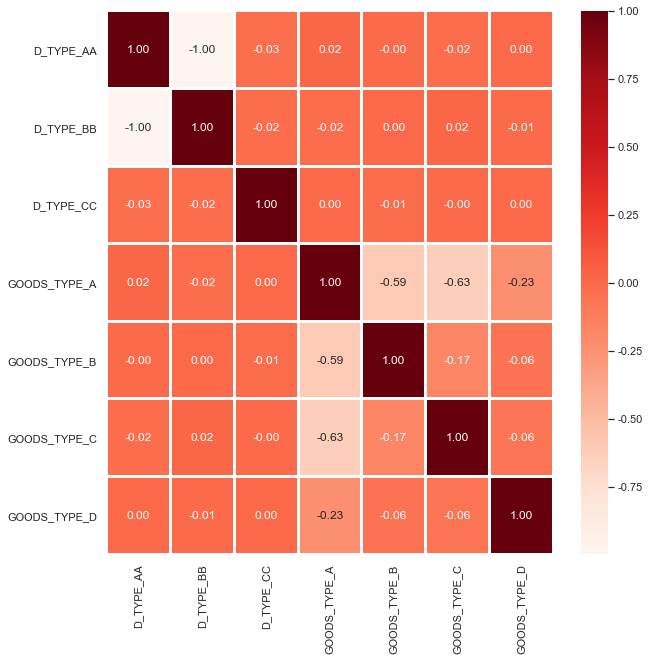

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(data=df.corr(), cmap="Reds", annot=True, fmt=".2f", linewidths=2)

- ohe을 진행하여 상관관계를 파악했을 때, 선형관계가 거의 없는 것을 파악

### 카이제곱검정 (카이스퀘어)

In [82]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [92]:
after_2013.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


In [93]:
# crosstab : 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용함.
contingency = pd.crosstab(after_2013.iloc[:,2],after_2013.iloc[:,4]) # D_TYPE, GOODS_TYPE만 뽑아서 corsstab
contingency

GOODS_TYPE,A,B,C,D
D_TYPE,,,,
AA,345779,65966,70010,11411
BB,262876,52435,60903,8327
CC,373,8,70,20


In [86]:
chi, p, dof, expected = chi2_contingency(contingency)

print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{contingency}", sep = "\n" )

chi 스퀘어 값: 581.6631839175374
p-value (0.05): 2.1022490329855966e-122
자유도 수: 6
기대값: 
               0             1             2             3
0  342017.111164  66495.964251  73557.253971  11095.670613
1  266684.244137  51849.528534  57355.494903   8651.732426
2     326.644698     63.507215     70.251126     10.596961
측정값: 
GOODS_TYPE       A      B      C      D
D_TYPE                                 
AA          345779  65966  70010  11411
BB          262876  52435  60903   8327
CC             373      8     70     20


- 코드 참고 URL : https://alex-blog.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%B9%B4%EC%9D%B4%EC%8A%A4%ED%80%98%EC%96%B4-%EA%B2%80%EC%A0%95-feat-python

### 결론 : p-value가 0.05보다 작다 => 두 변수는 관계가 없다.

- p-value는 통상적으로 0.05(5%)를 기준으로 잡는데, 이 유의수준은 귀무 가설을 (잘못) 기각할 위험이 5%이하라는 뜻
- 근데 두 범주형 변수 간의 관계를 검정해봤는데 p-value가 0.05보다 한참 작음 => 귀무 가설(H0 : 두 변수 간의 관계가 있다) 기각관계가 없다...!!